![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

<!-- ========================================================= -->
<!--        John Snow Labs - Package Installation Guide         -->
<!--        JupyterLab Single Markdown Cell (HTML Content)      -->
<!-- ========================================================= -->

<h1>Package Installation</h1>

<!-- Link to official GitHub repository -->
<p>
  Official Repository:
  <a href="https://github.com/JohnSnowLabs/johnsnowlabs" target="_blank">
    https://github.com/JohnSnowLabs/johnsnowlabs
  </a>
</p>

<!-- License setup instructions -->
<p>
  Keep your <strong>license keys</strong> in a JSON file and point to it using the
  <code>json_license_path</code> argument when starting the Spark session.
</p>

<!-- Visual NLP configuration note -->
<p>
  Set <code>visual=True</code> while starting the Spark session to install and make
  <strong>Visual NLP libraries</strong> available.
</p>

<!-- Restart note -->
<p>
  ⚠️ <strong>Important:</strong> After installing the library, make sure to
  <strong>RESTART your session</strong> before running Spark again.
</p>

<!-- End of notebook cell -->

In [ ]:
!pip install -q johnsnowlabs

In [ ]:
from johnsnowlabs import nlp, visual, medical

nlp.install(refresh_install=True, visual=True, json_license_path="./spark_nlp_for_healthcare_spark_ocr_10538.json")

In [ ]:
### RESTART SESSION !!!!

In [1]:
from johnsnowlabs import visual, nlp

spark = nlp.start(visual=True, hardware_target="gpu", json_license_path="./spark_nlp_for_healthcare_spark_ocr_10538.json")

spark

👌 License info detected in file ./spark_nlp_for_healthcare_spark_ocr_10538.json


25/10/19 17:50:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


👌 Launched gpu optimized session with with: 🚀Spark-NLP==6.1.3, 💊Spark-Healthcare==6.1.1, 🕶Spark-OCR==6.1.0, running on ⚡ PySpark==3.4.0


<h1>LightPipelines Overview</h1>

<!-- Notebook purpose -->
<p>
  This notebook provides an introduction to <strong>LightPipelines</strong> — lightweight, efficient versions of
  Spark NLP pipelines. Light Pipelines only work on top of Scala Transformers. The examples demonstrated in this nb <strong>Text   Detection</strong>, <strong>Text Recognition</strong>, <strong>Visual Question Answering</strong> and <strong>PDF DeIdentification</strong>.
</p>

<!-- Stages list -->
<h2>Concepts and Components Covered in this Notebook</h2>
<ul>
  <li>BinaryToImage</li>
  <li>ImageTextDetector</li>
  <li>ImageToText</li>
  <li>ImageToTextV2</li>
  <li>VisualQuestionAnswering</li>
  <li>LightPipeline Initialization</li>
</ul>

In [32]:
# 📦 Spark OCR Imports
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *

# ⚡ Spark NLP Core
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.pretrained import PretrainedPipeline

# 🔗 Spark ML
from pyspark.ml import Pipeline, PipelineModel
import pyspark.sql.functions as F

# 🧩 Spark NLP for Healthcare (JSL)
import sparknlp_jsl
from sparknlp_jsl.annotator import *

from IPython.display import display, Markdown

from sparkocr.base import LightPipeline
from PIL import Image, ImageDraw, ImageFont
import pkg_resources
import pandas as pd
import time

In [3]:
imagePath = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/check.jpg')

image_df = spark.read.format("binaryFile").load(imagePath)

image_df.columns

['path', 'modificationTime', 'length', 'content']

In [4]:
binary_to_image = BinaryToImage() \
    .setInputCol("content") \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

text_detector = ImageTextDetector.pretrained("image_text_detector_opt", "en", "clinical/ocr") \
    .setInputCol("image") \
    .setOutputCol("text_regions") \
    .setSizeThreshold(10) \
    .setScoreThreshold(0.85) \
    .setLinkThreshold(0.4) \
    .setTextThreshold(0.2) \
    .setWidth(0) \
    .setHeight(0)

opt_pipeline = Pipeline(stages=[
    binary_to_image,
    text_detector
])

image_text_detector_opt download started this may take some time.
Approximate size to download 75.8 MB


In [5]:
lp = LightPipeline(opt_pipeline.fit(image_df))

In [6]:
result = lp.fromLocalPath(imagePath)

In [7]:
result[0]["text_regions"]

[Coordinate (x: 289.0, y: 43.0, width: 38.0, height: 306.0),
 Coordinate (x: 284.0, y: 77.0, width: 38.0, height: 268.0),
 Coordinate (x: 287.9856, y: 110.41658, width: 388.08832, height: 38.95169),
 Coordinate (x: 290.0, y: 176.0, width: 36.0, height: 152.0),
 Coordinate (x: 285.0, y: 208.0, width: 36.0, height: 266.0),
 Coordinate (x: 283.99442, y: 242.4238, width: 372.17932, height: 35.86441),
 Coordinate (x: 143.0, y: 306.0, width: 40.0, height: 174.0),
 Coordinate (x: 463.0, y: 307.0, width: 34.0, height: 66.0),
 Coordinate (x: 125.0, y: 340.0, width: 32.0, height: 134.0),
 Coordinate (x: 464.0, y: 342.0, width: 32.0, height: 64.0),
 Coordinate (x: 166.99998, y: 371.99997, width: 225.99997, height: 35.999992),
 Coordinate (x: 121.0, y: 438.0, width: 36.0, height: 130.0),
 Coordinate (x: 457.0, y: 439.0, width: 38.0, height: 78.0),
 Coordinate (x: 95.0, y: 470.0, width: 36.0, height: 82.0),
 Coordinate (x: 457.0, y: 472.0, width: 36.0, height: 82.0),
 Coordinate (x: 153.0, y: 504.0

In [8]:
#OCR

In [9]:
binary_to_image = BinaryToImage()\
      .setInputCol("content") \
      .setOutputCol("image")

ocr = ImageToText() \
      .setInputCol("image") \
      .setOutputCol("text") \
      .setConfidenceThreshold(65) \
      .setKeepLayout(False) \
      .setWithSpaces(False)

image_to_text_pipeline = Pipeline(stages=[
    binary_to_image,
    ocr
])

In [10]:
lp = LightPipeline(image_to_text_pipeline.fit(image_df))

In [11]:
result = lp.fromLocalPath(imagePath)
result[0]["text"]

Annotation(image_to_text, 0, 185, STARBUCKS Store #19208
11902 Euclid Avenue
Cleveland, OH (216) 229-U749

CHK 664250
12/07/2014 06:43 PM
112003. Drawer: 2. Reg: 2

oBUX Card «3228 New Balance: 37.45
Card is registertd
, Map(confidence -> 73.70487899780274, exception -> , sourcePath -> check.jpg), [])

In [12]:
binary_to_image = BinaryToImage()\
      .setInputCol("content") \
      .setOutputCol("image")

text_detector = ImageTextDetector.pretrained("image_text_detector_mem_opt", "en", "clinical/ocr") \
    .setInputCol("image") \
    .setOutputCol("text_regions") \
    .setScoreThreshold(0.7) \
    .setLinkThreshold(0.5) \
    .setWithRefiner(True) \
    .setTextThreshold(0.4) \
    .setSizeThreshold(-1) \
    .setUseGPU(False) \
    .setWidth(0)

ocr = ImageToTextV2.pretrained("ocr_base_printed_v2_opt", "en", "clinical/ocr") \
    .setRegionsColumn("text_regions") \
    .setInputCols(["image"]) \
    .setOutputCol("text") \
    .setOutputFormat("text_with_positions") \
    .setGroupImages(False) \
    .setKeepInput(True) \
    .setUseGPU(False) \
    .setUseCaching(True) \
    .setBatchSize(4)

image_to_text_v2_pipeline = Pipeline(stages=[
    binary_to_image,
    text_detector,
    ocr
])

image_text_detector_mem_opt download started this may take some time.
Approximate size to download 77.5 MB


In [13]:
lp = LightPipeline(image_to_text_v2_pipeline.fit(image_df))

In [14]:
result = lp.fromLocalPath(imagePath)
result[0]["text"]

Annotation(image_to_text, 0, 334, STARBUCKS STORE #10208
11302 EUCLID AVENUE
CLEVELAND, OH (216) 229-0749
CHK 664290
12/07/2014 06:43 PM
1912003 DRAWER: 2. REG: 2
VT PEP MOCHA 4.95
SBUX CARD 4.95
XXXXXXXXXXXX3228
SUBTOTAL : $4.95
TOTAL $4.95
CHANGE DUE $0.00
---------------- CHECK CLOSED ----
12/07/2014 06:43 PM
SBUX CARD X3228 NEW BALANCE: 37.45
CARD IS REGISTERED., Map(exception -> null, sourcePath -> check.jpg, confidence -> 0.0), [])

In [15]:
#VQA

In [16]:
test_image_path = pkg_resources.resource_filename('sparkocr', 'resources/ocr/vqa/agenda.png')
vqa_df = spark.read.format("binaryFile").load(test_image_path)

vqa_df.columns

['path', 'modificationTime', 'length', 'content']

In [17]:
questions = [[
  "When is the Coffee Break?",
  "Who is giving the Introductory Remarks?",
  "Who is going to take part of the individual interviews?"
]]

questions_df = spark.createDataFrame([questions])
questions_df = questions_df.withColumnRenamed("_1", "questions")

In [18]:
image_and_questions = vqa_df.join(questions_df)
image_and_questions

+--------------------+--------------------+------+--------------------+--------------------+
|                path|    modificationTime|length|             content|           questions|
+--------------------+--------------------+------+--------------------+--------------------+
|file:/usr/local/l...|2025-10-19 09:12:...|928251|[89 50 4E 47 0D 0...|[When is the Coff...|
+--------------------+--------------------+------+--------------------+--------------------+

In [19]:
binary_to_image = BinaryToImage()\
    .setInputCol("content") \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

visual_question_answering = VisualQuestionAnswering()\
    .pretrained("docvqa_pix2struct_jsl", "en", "clinical/ocr")\
    .setInputCol(["image"]) \
    .setOutputCol("vqa_results") \
    .setQuestions(questions[0]) \
    .setUseCaching(True) \
    .setUseGPU(False)

vqa_pipeline = Pipeline(stages=[
    binary_to_image,
    visual_question_answering
])

docvqa_pix2struct_jsl download started this may take some time.
Approximate size to download 999 MB


In [20]:
lp = LightPipeline(vqa_pipeline.fit(image_and_questions))

In [21]:
result = lp.fromLocalPath(test_image_path)

In [22]:
result[0]["vqa_results"]

AnswersOutput(questions_and_answers: [{'score': 0.7950329, 'question': 'When is the Coffee Break? ', 'answer': '  11:14 to 11:39 a.m.'}, {'score': 0.04167896, 'question': 'Who is giving the Introductory Remarks? ', 'answer': '  Lee A. Waller, TRRF Vice Presi-dent'}, {'score': 0.035235126, 'question': 'Who is going to take part of the individual interviews? ', 'answer': '  TRRF Public Board Members and Sci-entfic Advisory Council Members'}])

In [23]:
#PDF Deidentification

In [24]:
test_pdf_path = "./PDF_Deid_Deidentification_0.pdf"
pdf_df = spark.read.format("binaryFile").load(test_pdf_path)

pdf_df.columns

['path', 'modificationTime', 'length', 'content']

In [25]:
pdf_deid_multi_model_context_pipeline = PretrainedPipeline("pdf_deid_multi_model_context_pipeline", "en", "clinical/ocr")

stages = pdf_deid_multi_model_context_pipeline.model.stages.copy()

stages

pdf_deid_multi_model_context_pipeline download started this may take some time.
Approx size to download 4.4 GB
[OK!]


[PdfToImage_3039dbc55d70,
 ImageToText_e47a60ca0cbf,
 DocumentAssembler_47aaa7f19fed,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_e1689c9bc262,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_9d4a08b1c03d,
 NerConverter_f230dec390db,
 CONTEXTUAL-PARSER_c654a34a3fa4,
 CONTEXTUAL-PARSER_33af26b2fdc0,
 CONTEXTUAL-PARSER_1b2769552347,
 CONTEXTUAL-PARSER_07bff3c2b284,
 CONTEXTUAL-PARSER_96b9d29769eb,
 CONTEXTUAL-PARSER_7aefd98e984c,
 ENTITY_EXTRACTOR_2ddfc4744b44,
 CONTEXTUAL-PARSER_99792b93398d,
 REGEX_MATCHER_2b137485db5e,
 CONTEXTUAL-PARSER_30dc43a095c1,
 CONTEXTUAL-PARSER_f64d354f0266,
 CONTEXTUAL-PARSER_72e20622d44a,
 CONTEXTUAL-PARSER_563cfd5f905d,
 REGEX_MATCHER_52d38a3643c9,
 MERGE_b0a322ec2787,
 MERGE_97a646c7a333,
 XLM_ROBERTA_EMBEDDINGS_b8a75c006754,
 MedicalNerModel_59183c57aedb,
 NER_CONVERTER_a3d70cd61248,
 PretrainedZeroShotNER_ca8c4dfe310f,
 NER_CONVERTER_86c4cbb15961,
 PretrainedZeroShotNER_5f30ab9002f1,
 NER_CONVERTER_b537928b54d8,
 MERGE_1b7360979a74,
 P

In [49]:
result = pdf_deid_multi_model_context_pipeline.transform(pdf_df)

In [50]:
%%time
result.write.format("parquet").mode("overwrite").save("./temp_deid_result")

CPU times: user 1.24 ms, sys: 1.14 ms, total: 2.38 ms
Wall time: 17.7 s



    Image #0:
    Origin: file:/content/PDF_Deid_Deidentification_0.pdf
    Resolution: 300 dpi
    Width: 2400 px
    Height: 3299 px
    Mode: 10
    Number of channels: 1


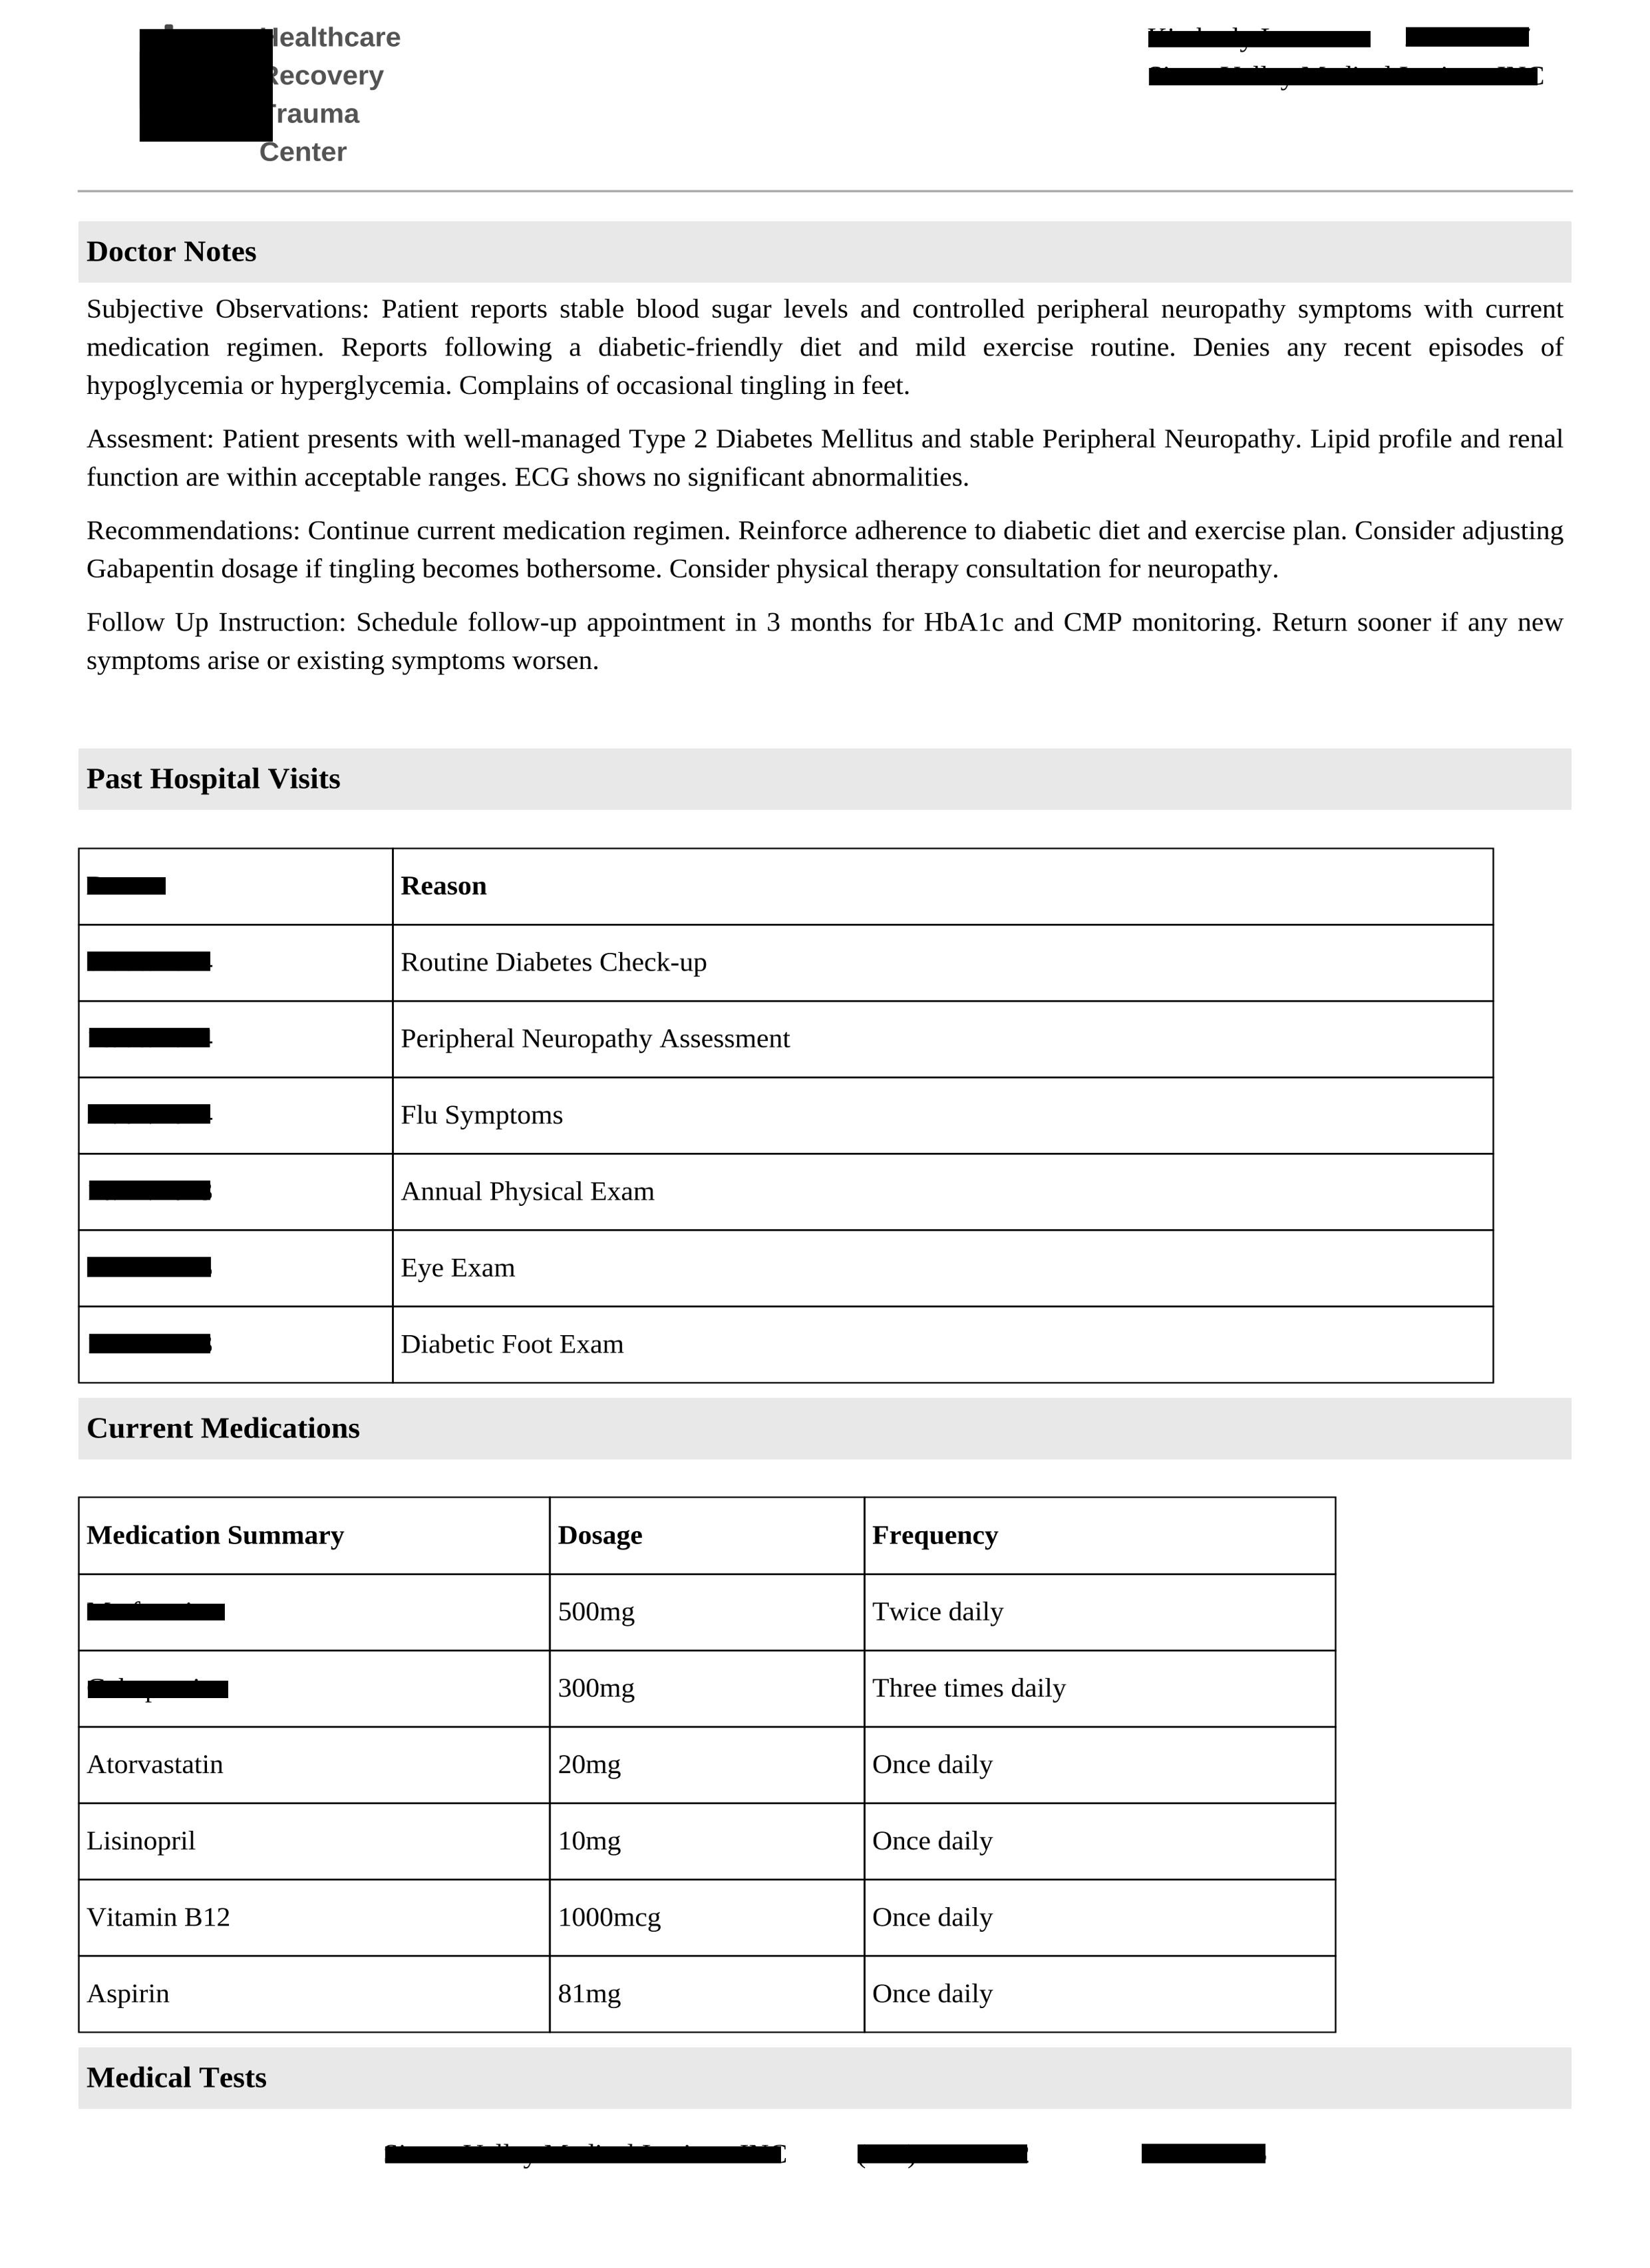


    Image #1:
    Origin: file:/content/PDF_Deid_Deidentification_0.pdf
    Resolution: 300 dpi
    Width: 2400 px
    Height: 3299 px
    Mode: 10
    Number of channels: 1


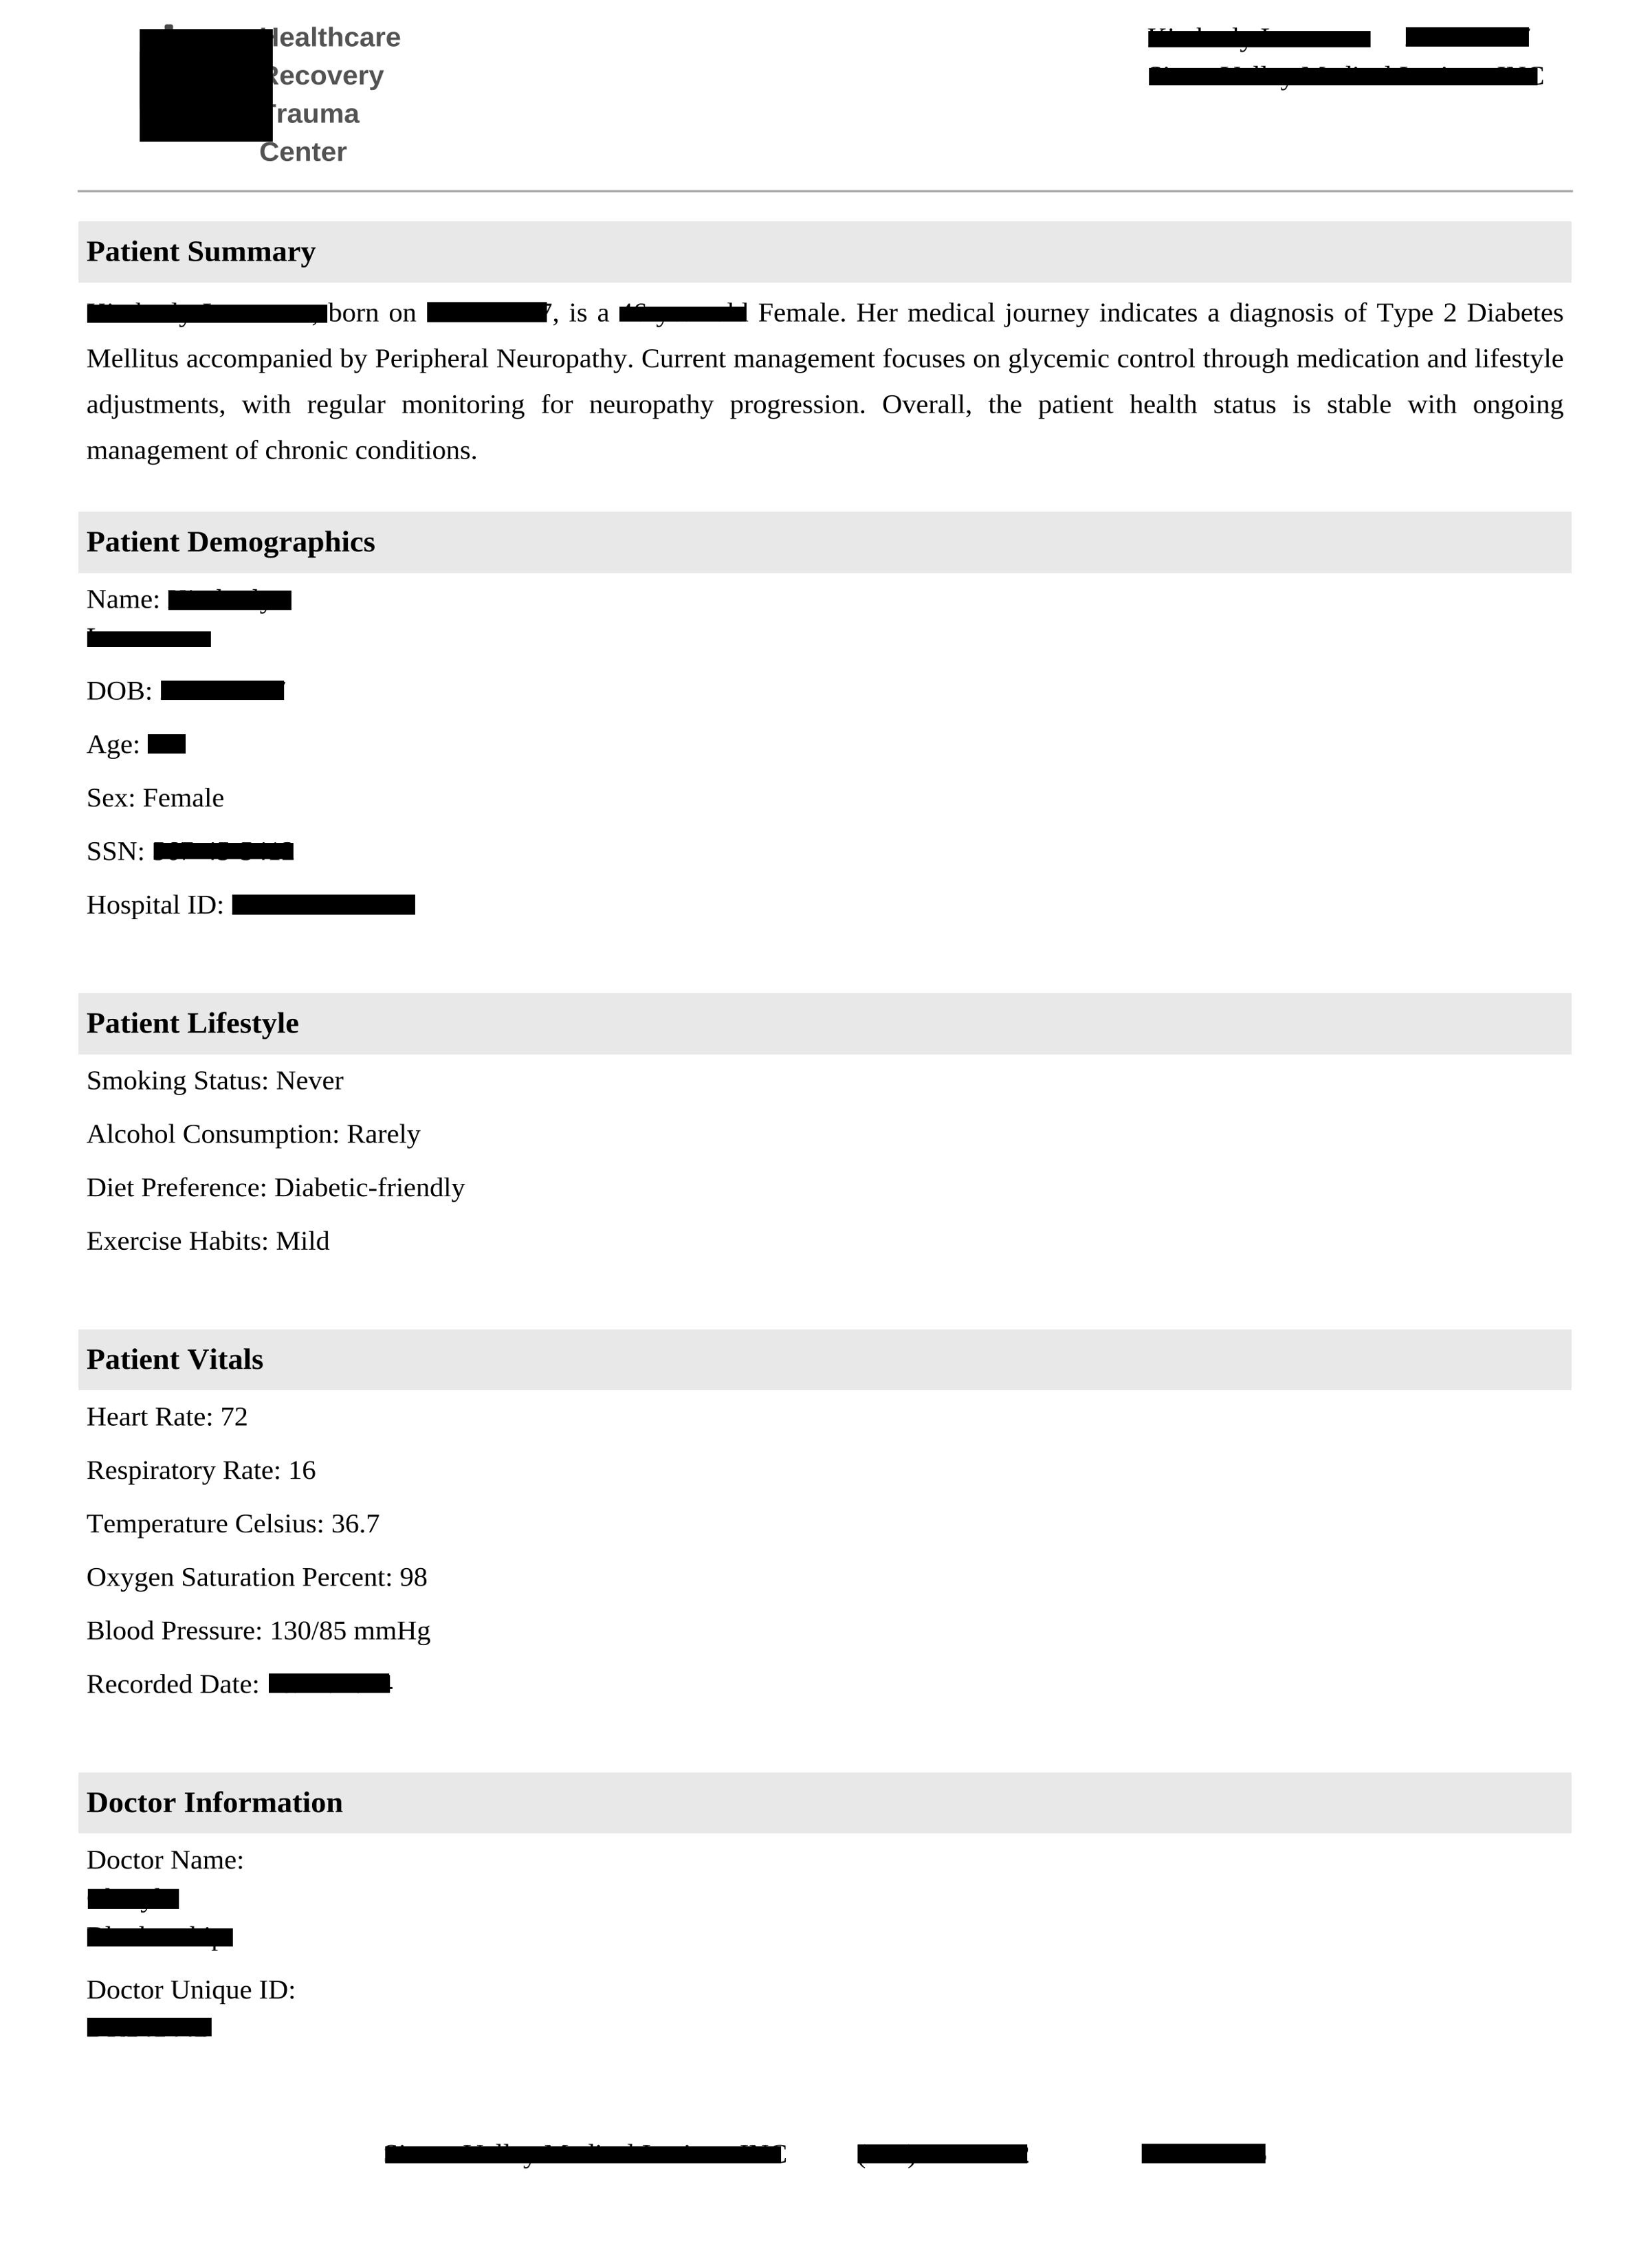


    Image #2:
    Origin: file:/content/PDF_Deid_Deidentification_0.pdf
    Resolution: 300 dpi
    Width: 2400 px
    Height: 3299 px
    Mode: 10
    Number of channels: 1


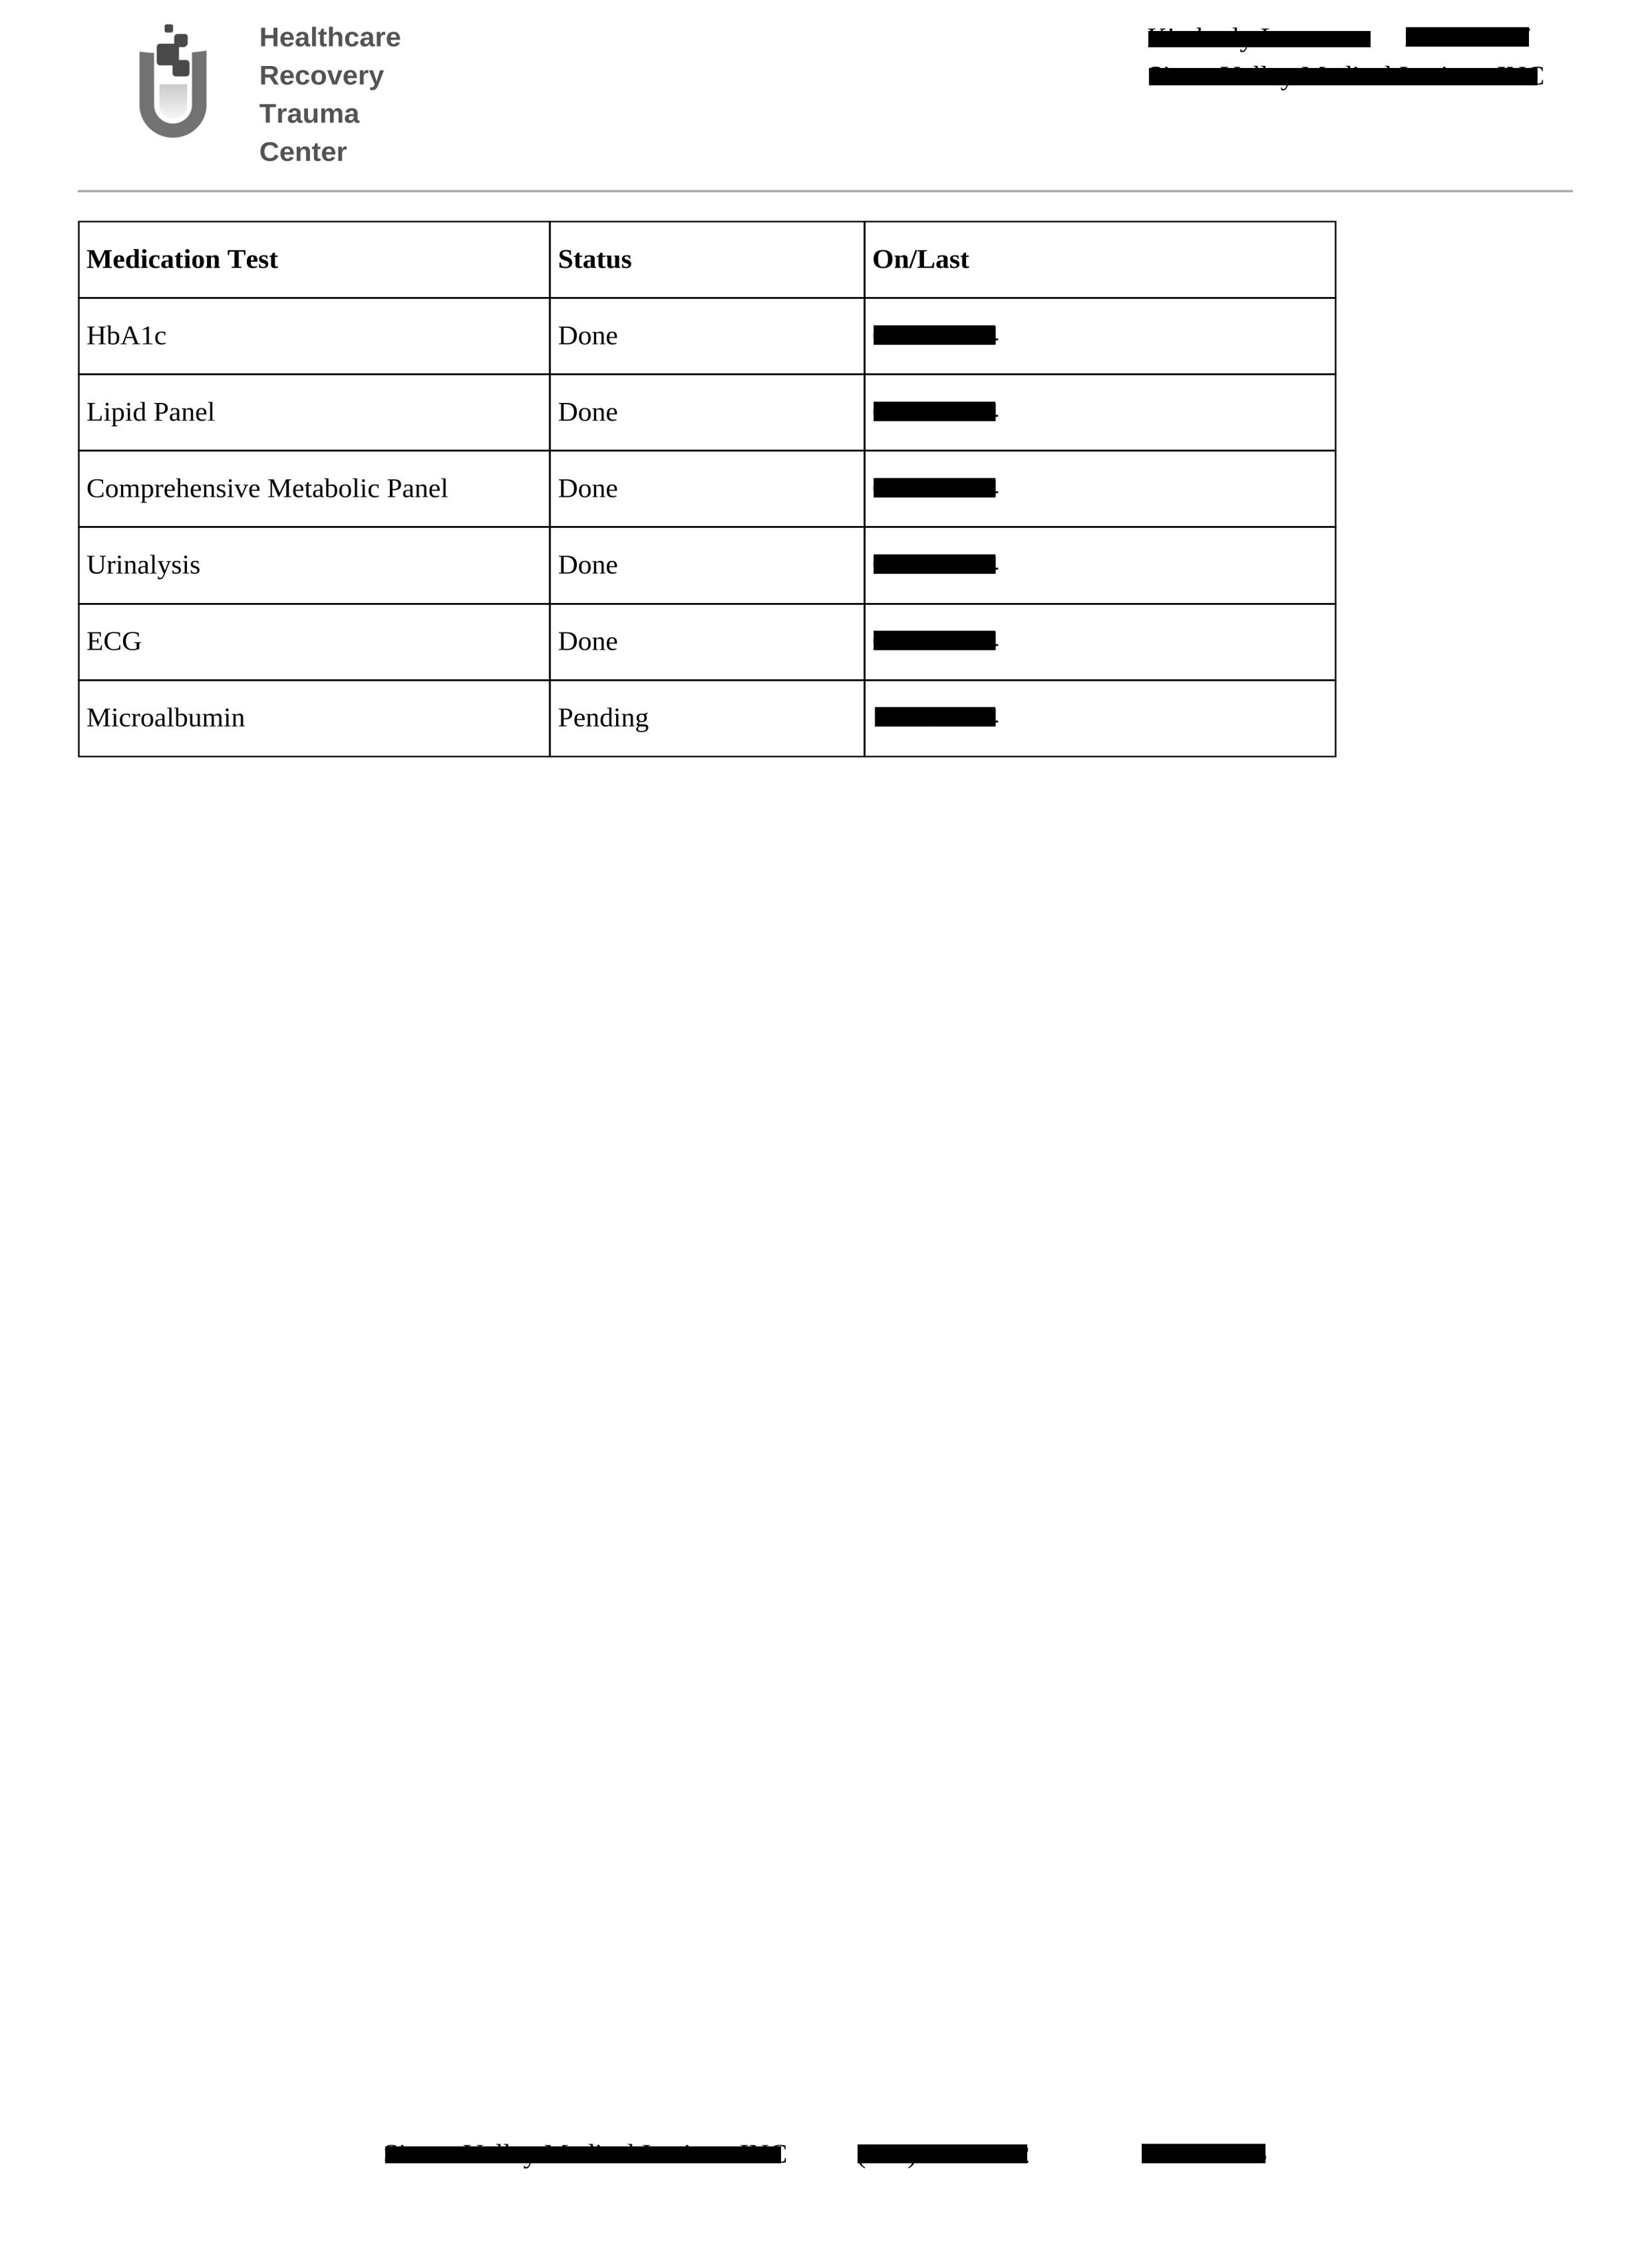

In [35]:
df = spark.read.format("parquet").load("./temp_deid_result")

display_pdf(df, "pdf")

In [36]:
new_deid_pipe = Pipeline(stages=stages[:-2])
lp = LightPipeline(new_deid_pipe.fit(pdf_df))

In [48]:
%%time
deid_result = lp.fromLocalPath(test_pdf_path)

CPU times: user 411 ms, sys: 604 ms, total: 1.01 s
Wall time: 20.4 s


In [38]:
deid_result[0].keys()

dict_keys(['coordinates', 'entity_ssn', 'ner_merged_medium', 'xlm_embeddings', 'ner_deid_name_multilingual', 'entity_vin', 'entity_dln', 'entity_country', 'document', 'ner_chunk', 'deid_merged_parse1', 'entity_med', 'ner_chunk_docwise_large', 'exception', 'entity_phone', 'entity_zip', 'text', 'entity_ipaddr', 'pagenum', 'entity_account', 'entity_email', 'ner_subentity', 'image_raw', 'positions', 'token', 'entity_date', 'ner_docwise_large', 'content', 'merged_ner_chunk', 'entity_age', 'embeddings', 'ner_chunk_subentity', 'ner_chunk_merged_medium', 'entity_license', 'ner_chunk_name_multilingual', 'sentence', 'entity_plate'])

In [39]:
images = []

pdf_to_image = PdfToImage() \
    .setInputCol("content") \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

result = pdf_to_image.transform(pdf_df)
result.columns

['path',
 'modificationTime',
 'length',
 'image',
 'total_pages',
 'exception',
 'pagenum',
 'documentnum']

In [40]:
images = []
for item in result.orderBy("pagenum").toLocalIterator():
  image_dict = item["image"]
  img = to_pil_image(image_dict, image_dict["mode"])
  images.append(img)

In [41]:
coordinates = []
for item in deid_result:
  coordinate = [[coord.x, coord.y, coord.x + coord.width, coord.y +coord.height] for coord in item["coordinates"]]
  coordinates.append(coordinate)

In [42]:
for item in zip(images, coordinates):
  draw = ImageDraw.Draw(item[0])

  for coord in item[1]:
    draw.rectangle(coord, outline="black", fill="black")

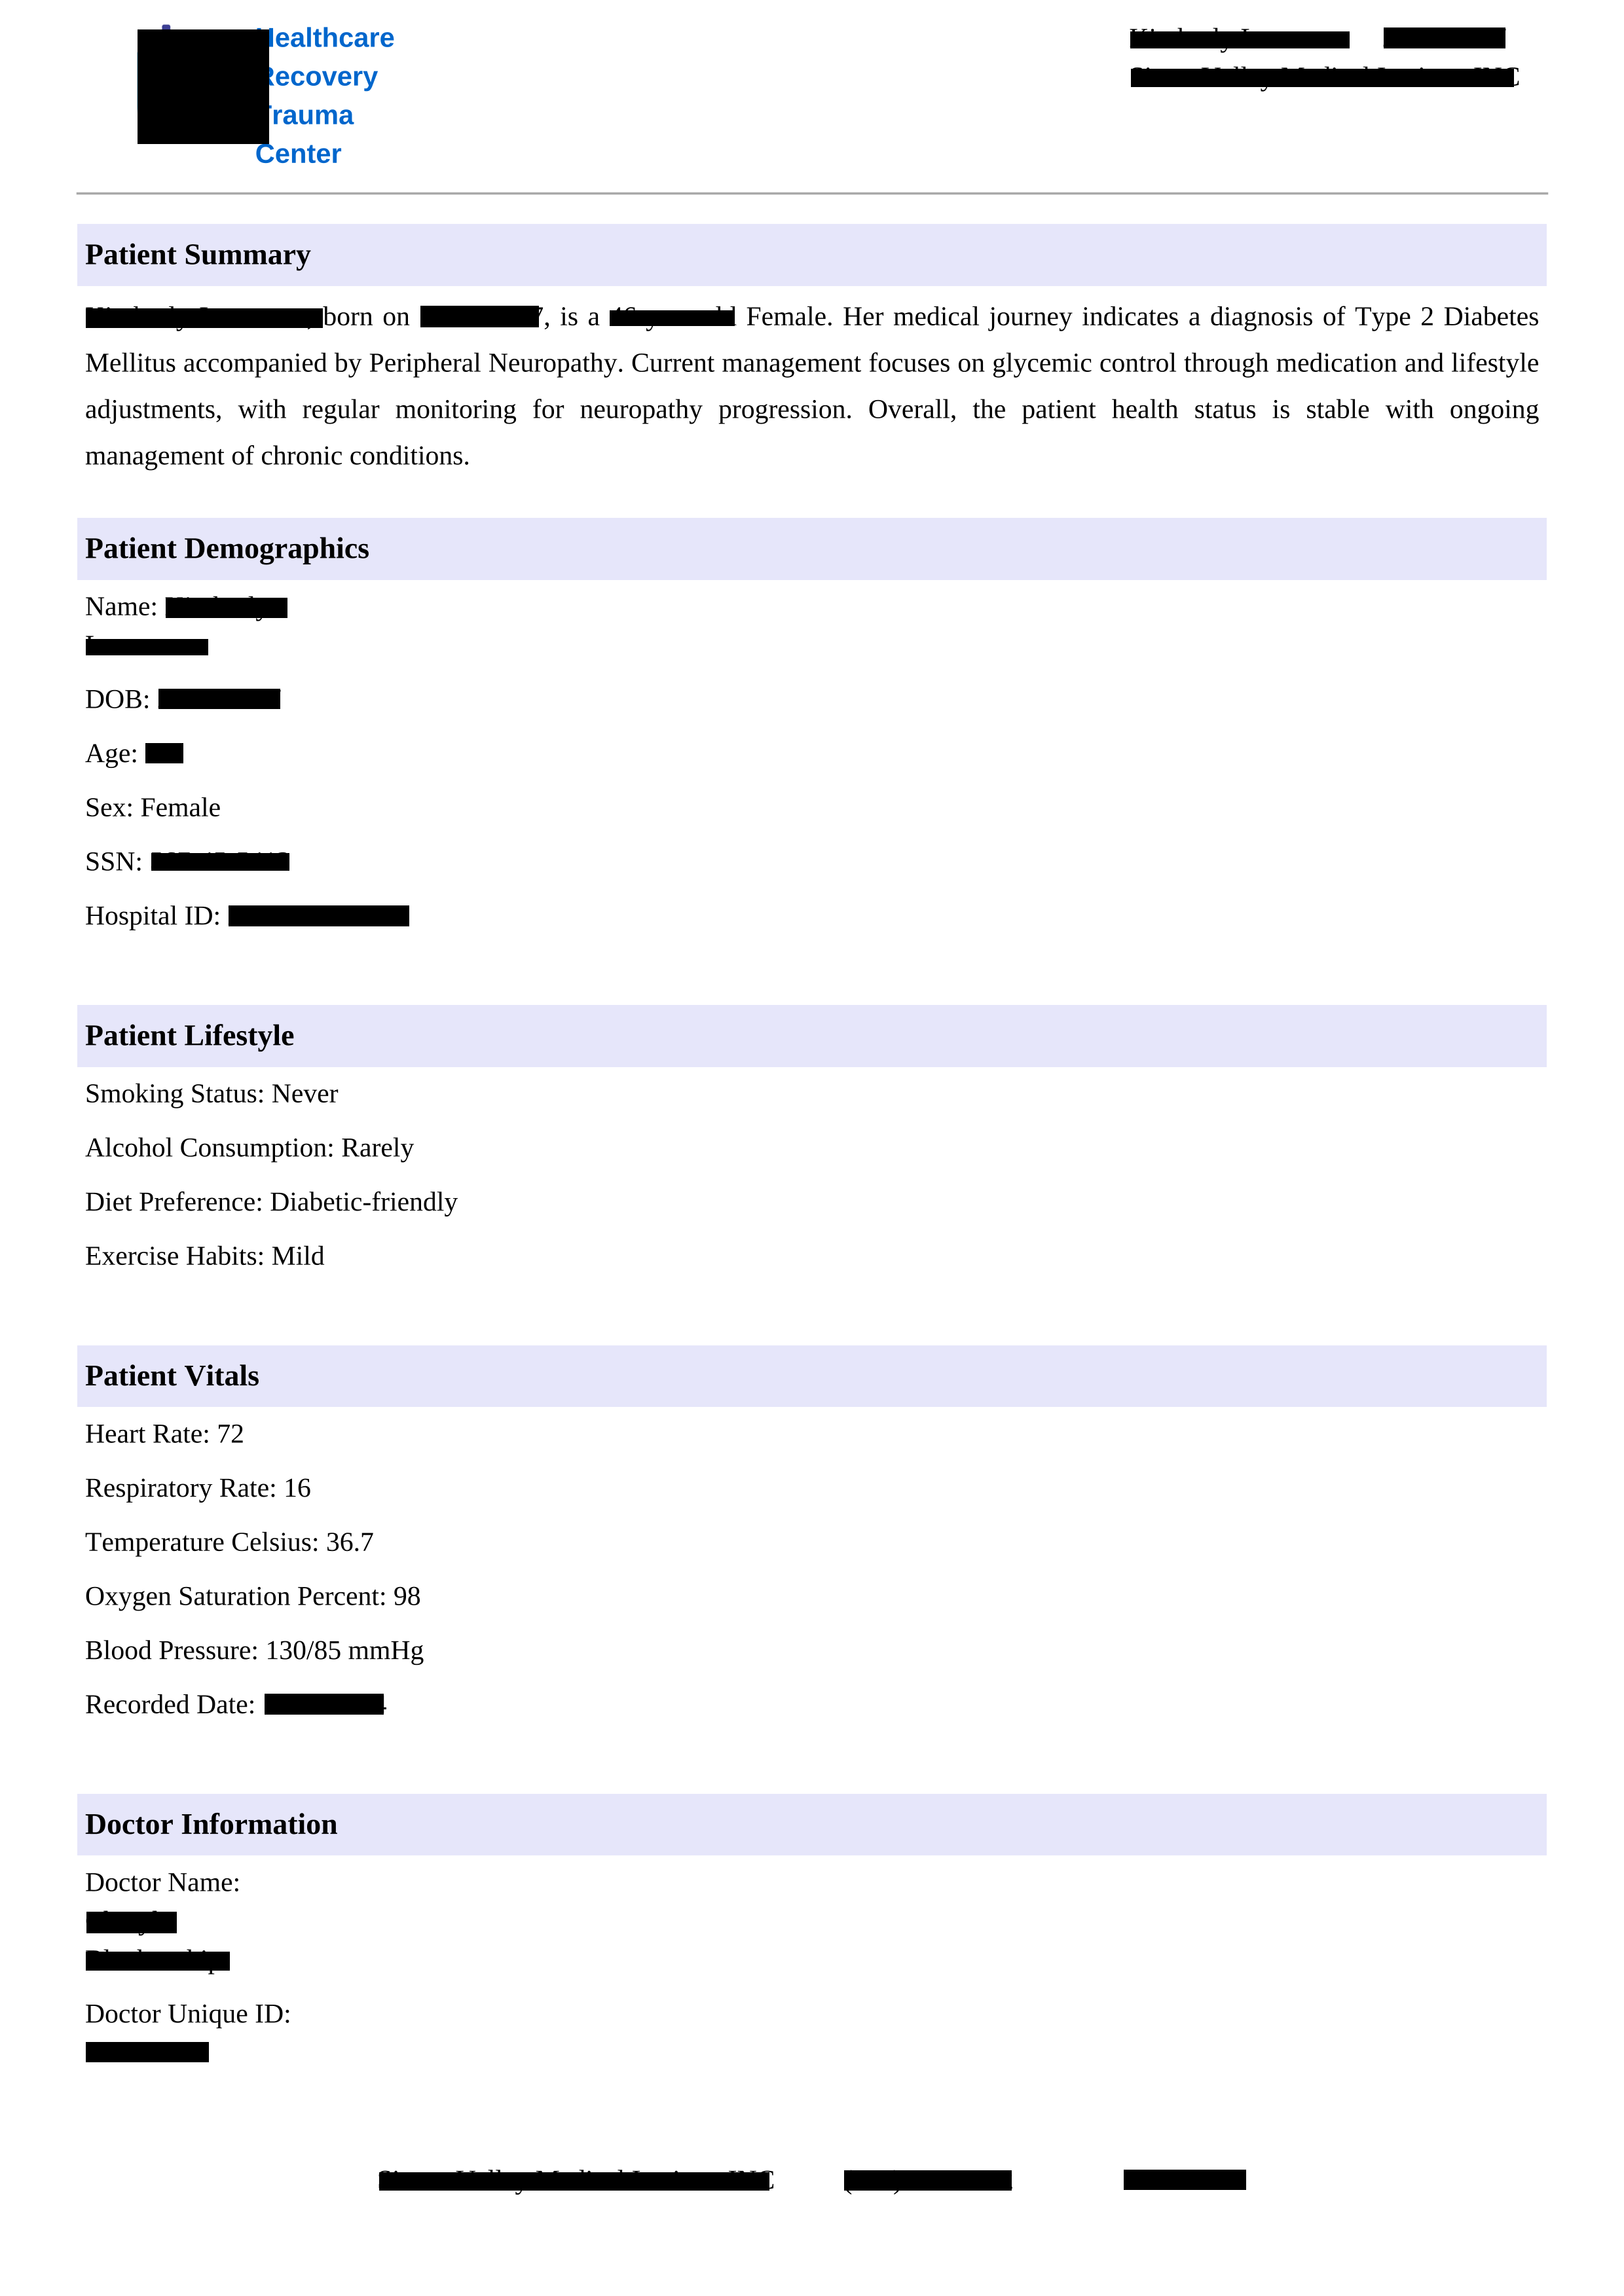

In [43]:
images[0]

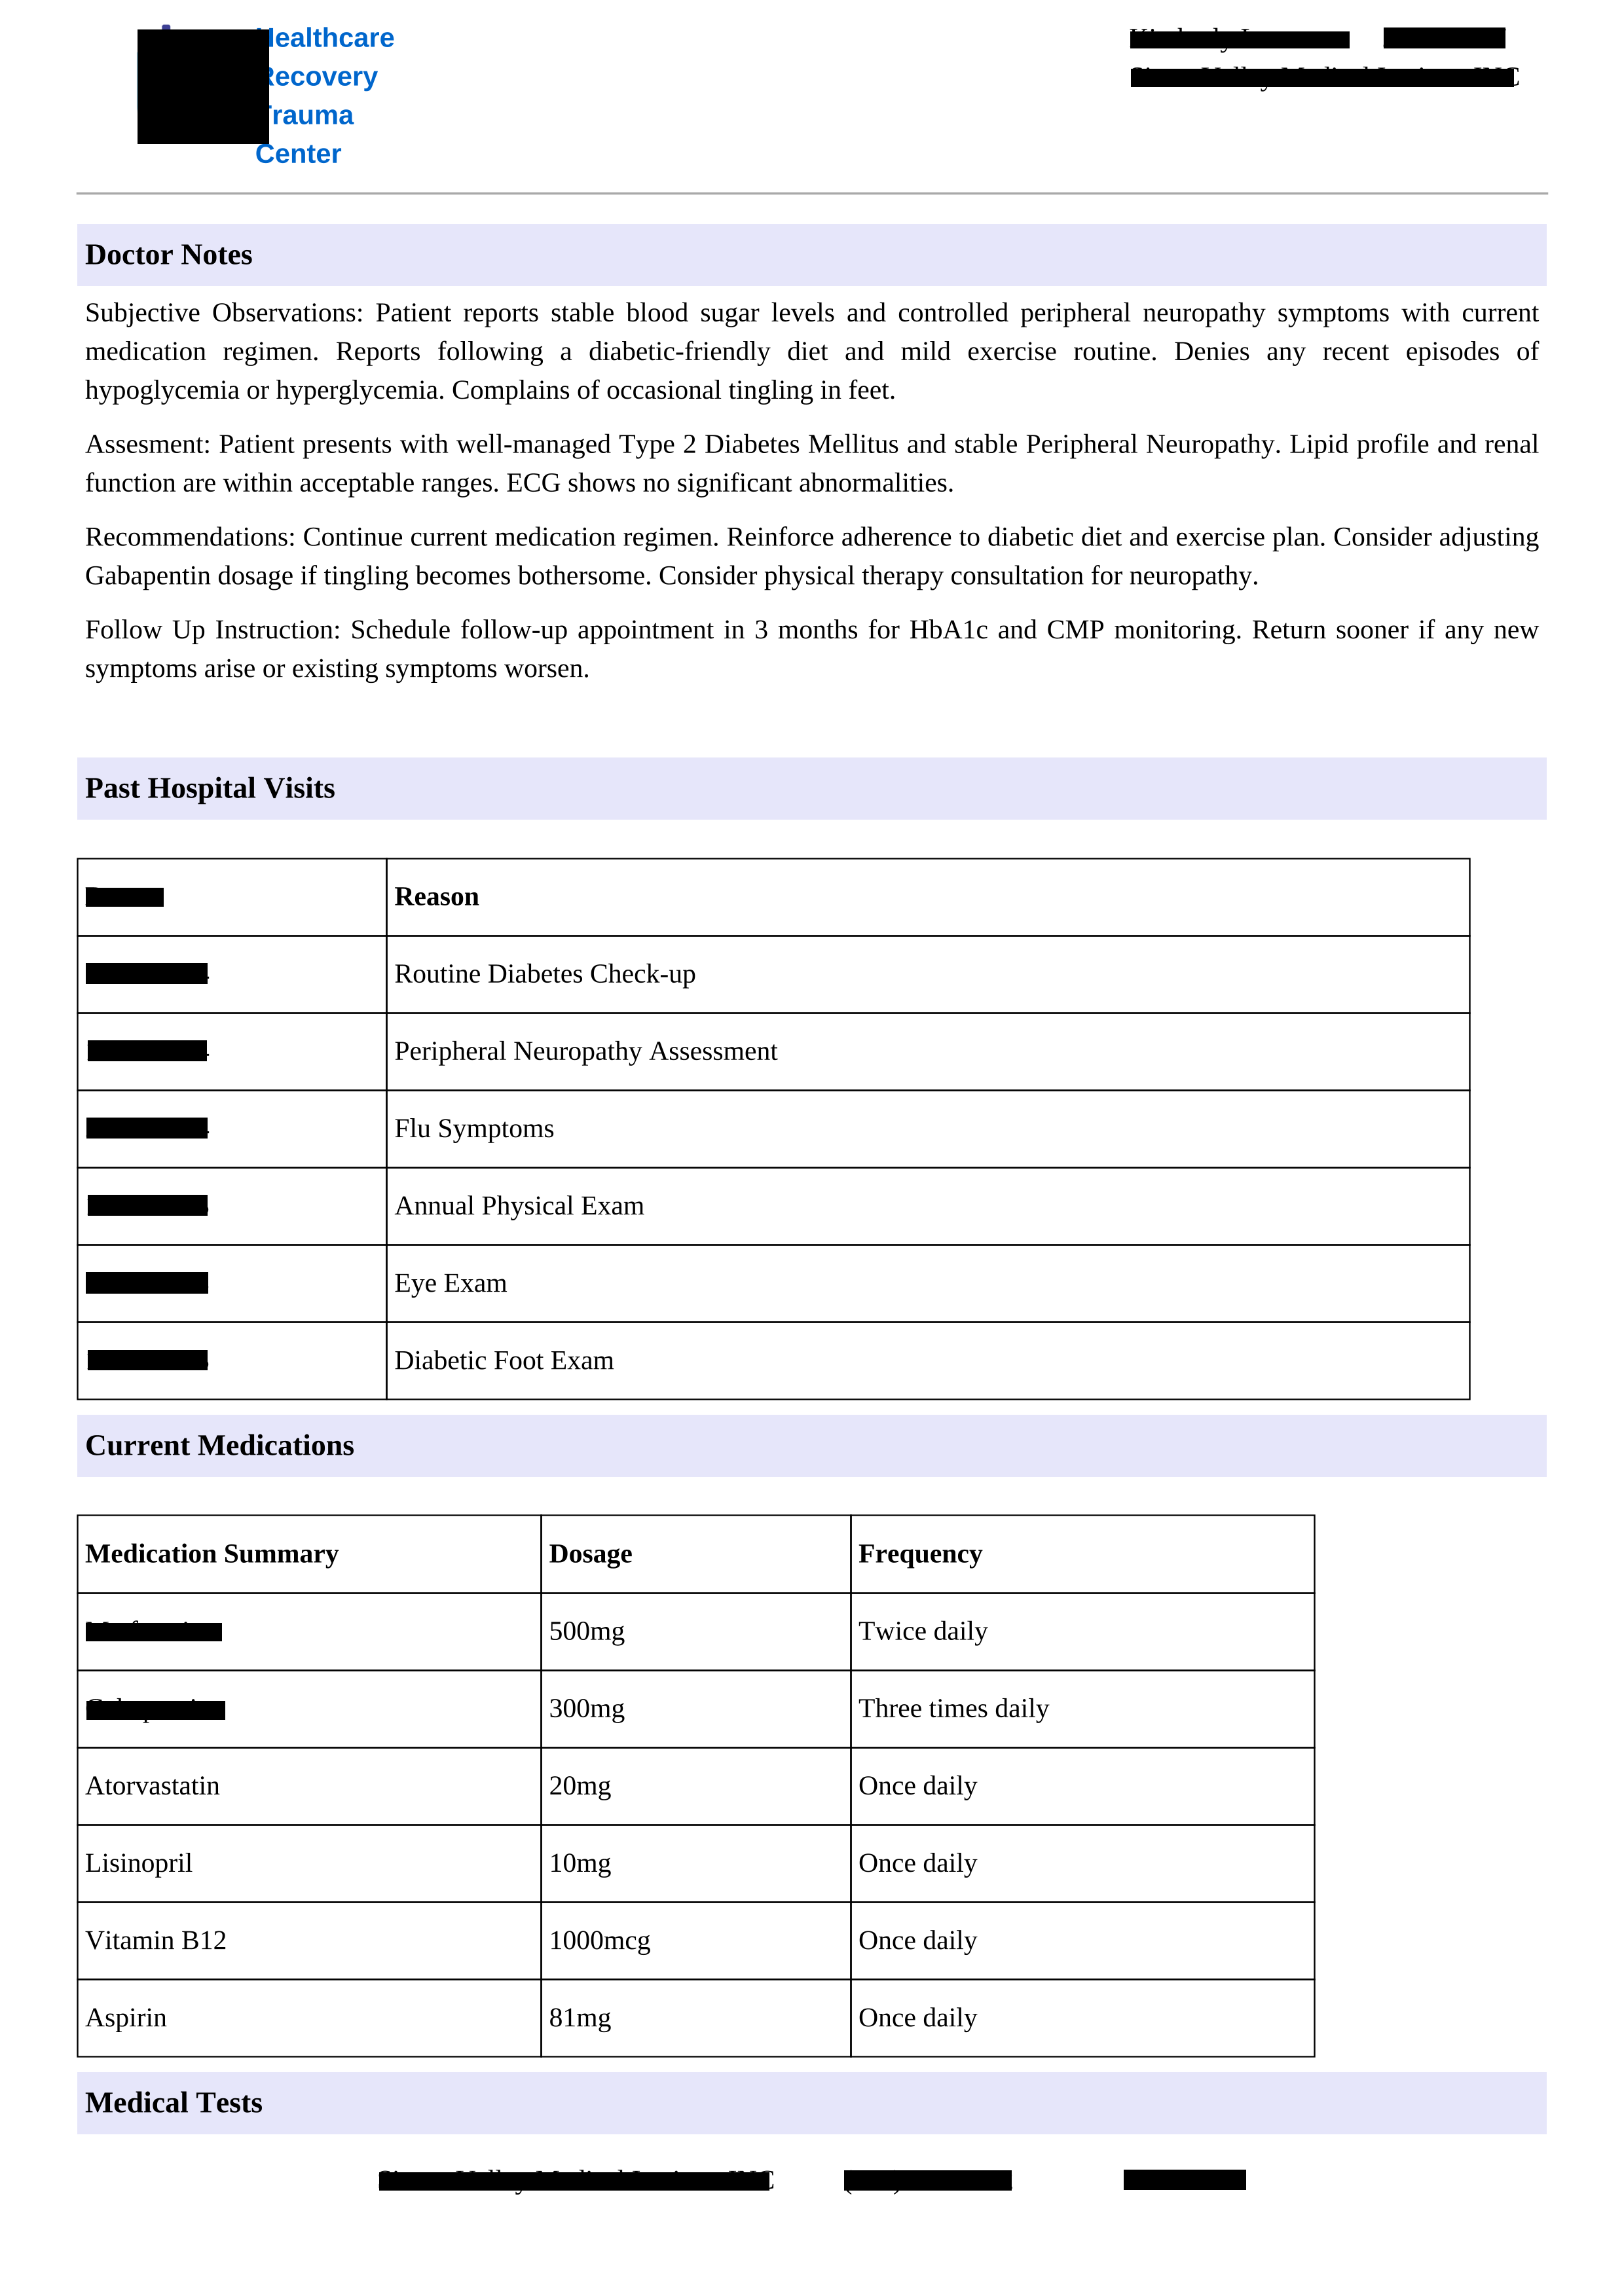

In [44]:
images[1]

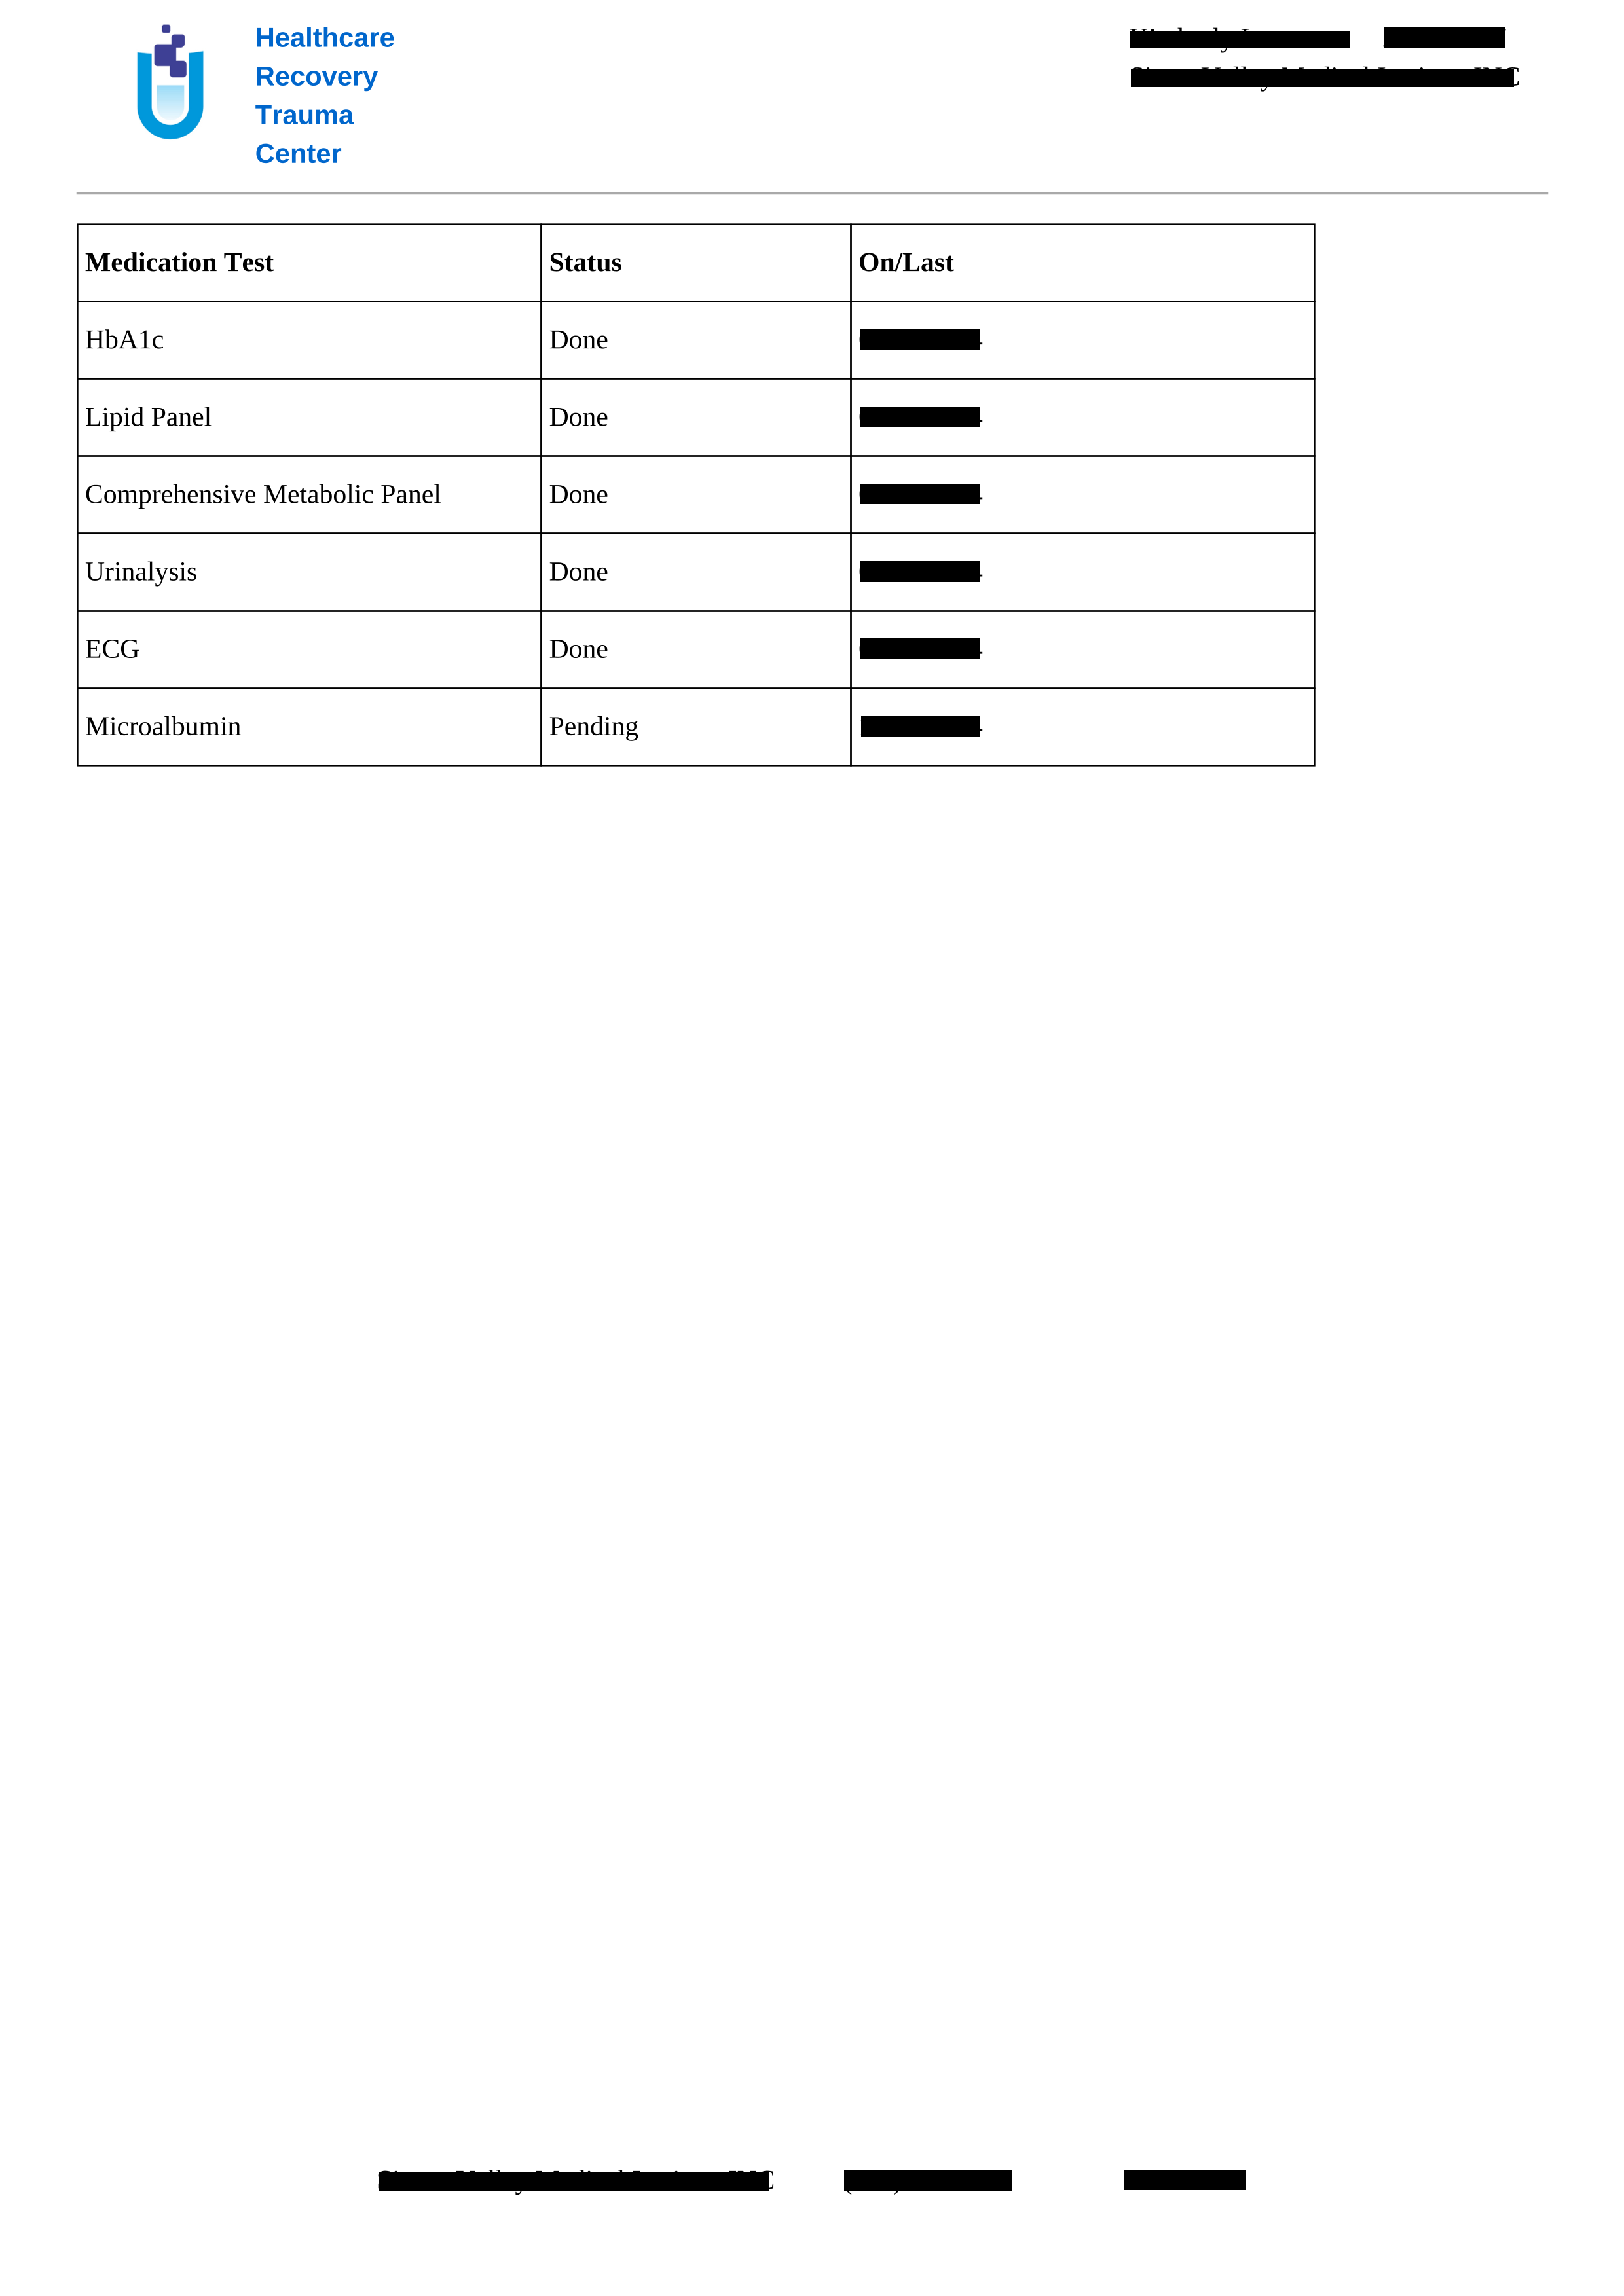

In [45]:
images[2]